In [39]:
import os
import re
import numpy as np
import pandas as pd
from pprint import pprint

# reading docfiles
import docx2txt

# bertopic
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# nltk
import nltk

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import pyLDAvis.lda_model
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [14]:
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
umap_model = UMAP(n_neighbors=3, n_components=3, min_dist=0.05)
hdbscan_model = HDBSCAN(min_cluster_size=80, min_samples=40,
                        gen_min_span_tree=True,
                        prediction_data=True)

In [18]:
word_exclusions = pd.read_excel("input/word_exclusions.xlsx")

word_exclusions = word_exclusions[word_exclusions["exclude"] == 1]

word_exclusions = word_exclusions.drop(columns=['exclude', 'exclude_short_list'], axis = 1)



In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stop_words = stopwords.words('german')
stop_words.extend(word_exclusions["word"])

# we add this to remove stopwords that can pollute topcs
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stopwords)

In [22]:
data = pd.read_excel("input/app_v1/app_v1_feedback.xlsx")

In [25]:
strengths = data[data["category_id"] == 9]

strengths = strengths.drop(columns=['transcript_id', 'person_id', 'segment_id', 'context', 'lesson', 'category_id'], 
             axis = 1)

In [26]:
strengths['text_processed'] = \
strengths['text'].map(lambda x: re.sub('[,.!?]', '', x))

In [27]:
strengths['text_processed'] = \
strengths['text_processed'].map(lambda x: x.lower())

In [28]:
docs = data.text.to_list()

In [32]:
model = BERTopic(language="German", verbose = True)

In [44]:
topics, probabilities = model.fit_transform(docs)

Batches:   0%|          | 0/22 [00:00<?, ?it/s]

2023-05-29 13:58:49,540 - BERTopic - Transformed documents to Embeddings
2023-05-29 13:58:54,044 - BERTopic - Reduced dimensionality
2023-05-29 13:58:54,165 - BERTopic - Clustered reduced embeddings


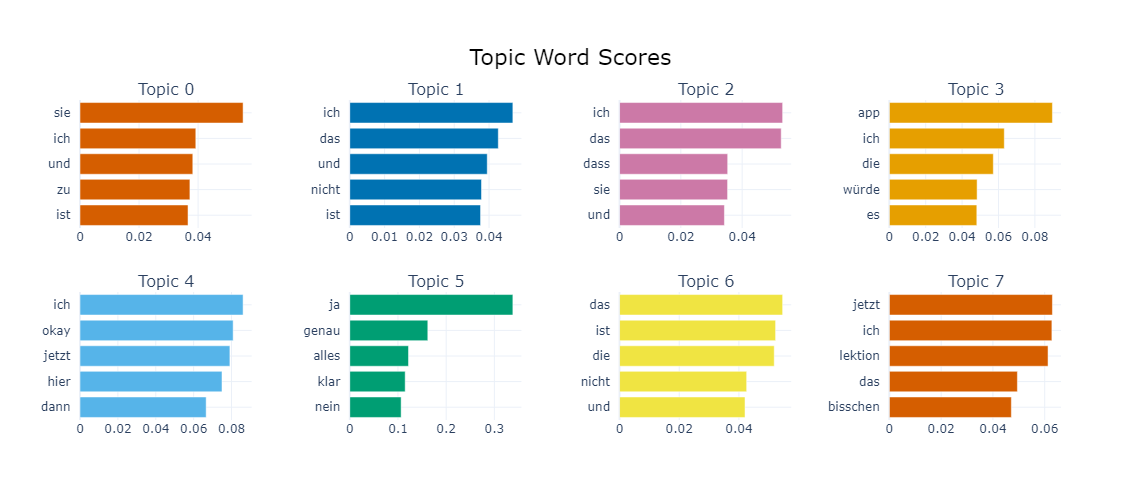

In [45]:
model.visualize_barchart()